<a href="https://colab.research.google.com/github/CarlosEstellita/Image-Processing/blob/main/First%20Steps/Medical%20Images%20-%20Thresholding/B%C3%A1sicoDoB%C3%A1sico_Threshold_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Básico do Básico - Segmentação de imagens com limiarização (pt. 2)

##Importando as bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #para plotar as imagens
import matplotlib.image as mpimg #para importar as imagens
import skimage.io #também para plotar imagens
import numpy as np #para trabalhar com as imagens
import sys
from matplotlib import rcParams #mudar os parâmetros das imagens
from skimage.filters import threshold_otsu #função que faz limiarização
from skimage.color import rgb2gray #função que converte imagens em RGB para escala de cinzas
from skimage import exposure #exposição
from skimage.exposure import histogram #função de fazer histogramas do skimage
from skimage.transform import rescale #reescalar o histograma
#from sklearn.metrics import jaccard_similarity_score

##Limiarização comum

###Importando e plotando as imagens

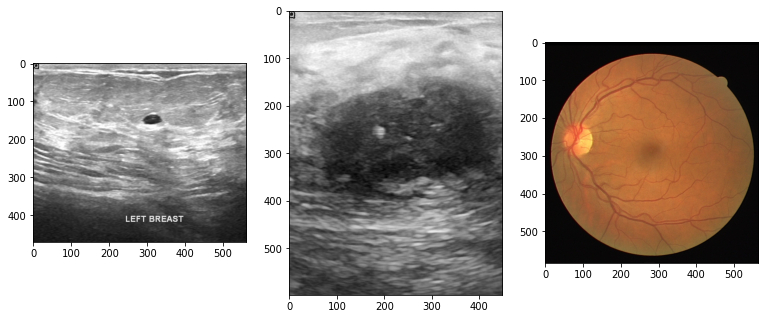

In [2]:
img_mama1 = mpimg.imread('benign (1).png')
img_mama2 = mpimg.imread('malignant (1).png')
img_retina = mpimg.imread('01_test.tif')

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_mama1)
ax[1].imshow(img_mama2)
ax[2].imshow(img_retina)

###Convertendo em escala de cinzas, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu

In [3]:
#Imagem do tumor benígno
img_mama1_gray = rgb2gray(img_mama1)
thresh1 = threshold_otsu(img_mama1_gray)
binary1 = img_mama1_gray > thresh1
print("Benígno: ", threshold_otsu(img_mama1_gray))

#Imagem do tumor malígno
img_mama2_gray = rgb2gray(img_mama2)
thresh2 = threshold_otsu(img_mama2_gray)
binary2 = img_mama2_gray > thresh2
print("Malígno: ", threshold_otsu(img_mama2_gray))

#Imagem de retina
img_retina_gray = rgb2gray(img_retina)
thresh3 = threshold_otsu(img_retina_gray)
binary3 = img_retina_gray > thresh3
print("Retina: ", threshold_otsu(img_retina_gray))

Benígno:  0.4628906
Malígno:  0.5136718
Retina:  0.23724137637867648


###Plotando a versão binarizada das imagens

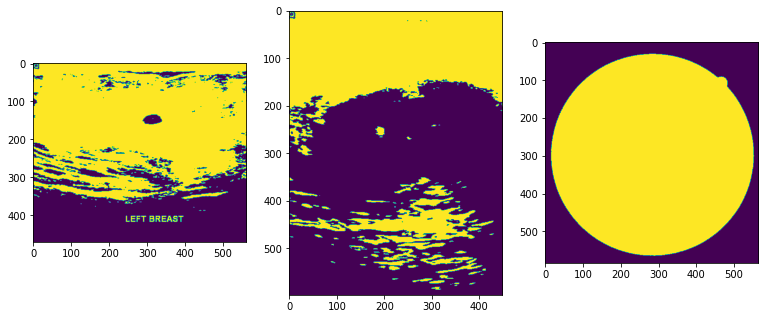

In [4]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(binary1)
ax[1].imshow(binary2)
ax[2].imshow(binary3)

###Plotando as imagens em escala de cinzas e em seguida seus histogramas

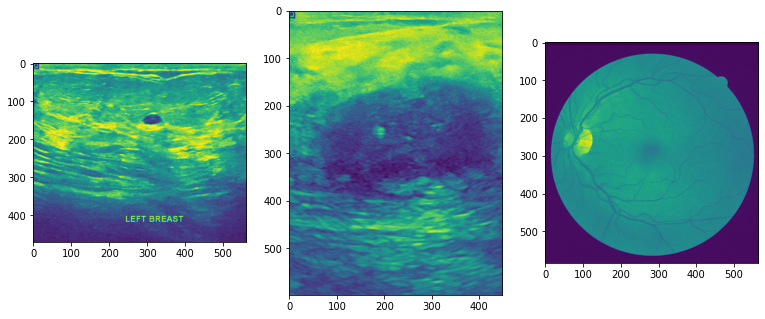

In [5]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_mama1_gray)
ax[1].imshow(img_mama2_gray)
ax[2].imshow(img_retina_gray)

"fig, ax = plt.subplots(1, 3)\nax[0].plot(histogram1)\nax[0].set_title('Benígno')\nax[1].plot(histogram2)\nax[1].set_title('Malígno')\nax[2].plot(histogram3)\nax[2].set_title('Retina')"

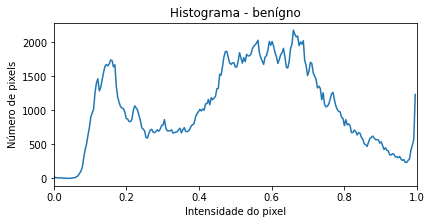

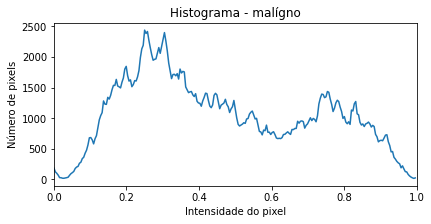

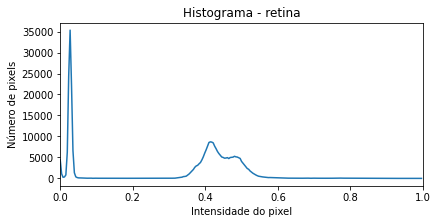

In [6]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram1, bin_edges = np.histogram(img_mama1_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - benígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram1)

#Histograma do tumor malígno
histogram2, bin_edges = np.histogram(img_mama2_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - malígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram2)

#Histograma de vasos da retina
histogram3, bin_edges = np.histogram(img_retina_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram3)

'''fig, ax = plt.subplots(1, 3)
ax[0].plot(histogram1)
ax[0].set_title('Benígno')
ax[1].plot(histogram2)
ax[1].set_title('Malígno')
ax[2].plot(histogram3)
ax[2].set_title('Retina')'''

###Reescalando a intensidade do histograma da retina e em seguida plotando

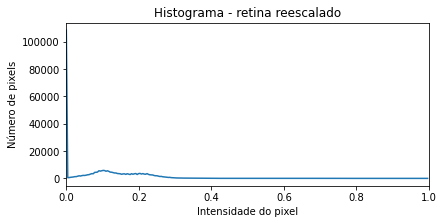

In [7]:
img_retina_gray_rescaled = exposure.rescale_intensity(img_retina_gray, in_range=(0.35, 1))

rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram3_2, bin_edges = np.histogram(img_retina_gray_rescaled, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina reescalado")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram3_2)

###Plotando nova limiarização da retina e retornando limiar de Otsu

Retina:  0.11770914522058824


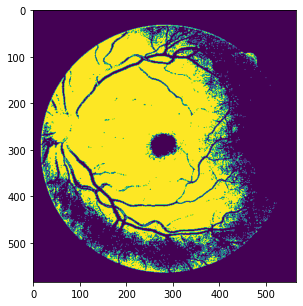

In [8]:
rcParams['figure.figsize'] = 8, 5
thresh1 = threshold_otsu(img_retina_gray_rescaled)
binary3_2 = img_retina_gray_rescaled > thresh1
print("Retina: ", threshold_otsu(img_retina_gray_rescaled))
imgplot = plt.imshow(binary3_2)

##Limiarização com equalização

###Equalizando e plotando as imagens equalizadas e originais

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


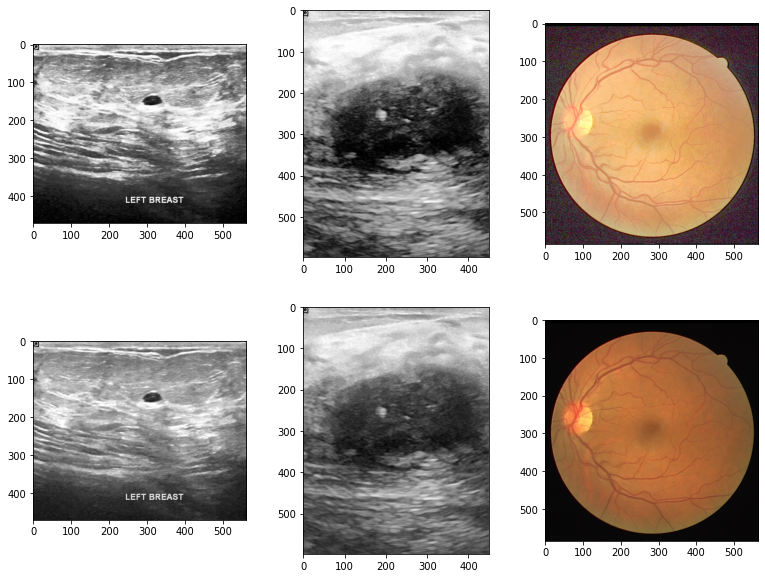

In [9]:
img_equalized_mama1 = exposure.equalize_hist(img_mama1)
img_equalized_mama2 = exposure.equalize_hist(img_mama2)
img_equalized_retina = exposure.equalize_hist(img_retina)

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img_equalized_mama1)
ax[1,0].imshow(img_mama1)
ax[0,1].imshow(img_equalized_mama2)
ax[1,1].imshow(img_mama2)
ax[0,2].imshow(img_equalized_retina)
ax[1,2].imshow(img_retina)

###Convertendo em escala de cinzas, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu

In [10]:
#Imagem do tumor benígno
img_equalized_mama1_gray = rgb2gray(img_equalized_mama1)
thresh4 = threshold_otsu(img_equalized_mama1_gray)
binary4 = img_equalized_mama1_gray > thresh4
print("Benígno: ", threshold_otsu(img_equalized_mama1_gray))

#Imagem do tumor malígno
img_equalized_mama2_gray = rgb2gray(img_equalized_mama2)
thresh5 = threshold_otsu(img_equalized_mama2_gray)
binary5 = img_equalized_mama2_gray > thresh5
print("Malígno: ", threshold_otsu(img_equalized_mama2_gray))

#Imagem de retina
img_equalized_retina_gray = rgb2gray(img_equalized_retina)
thresh6 = threshold_otsu(img_equalized_retina_gray)
binary6 = img_equalized_retina_gray > thresh6
print("Retina: ", threshold_otsu(img_equalized_retina_gray))

Benígno:  0.494199867622364
Malígno:  0.4983927246701142
Retina:  0.4319039906739012


###Plotando a limiarização equalizada e normal

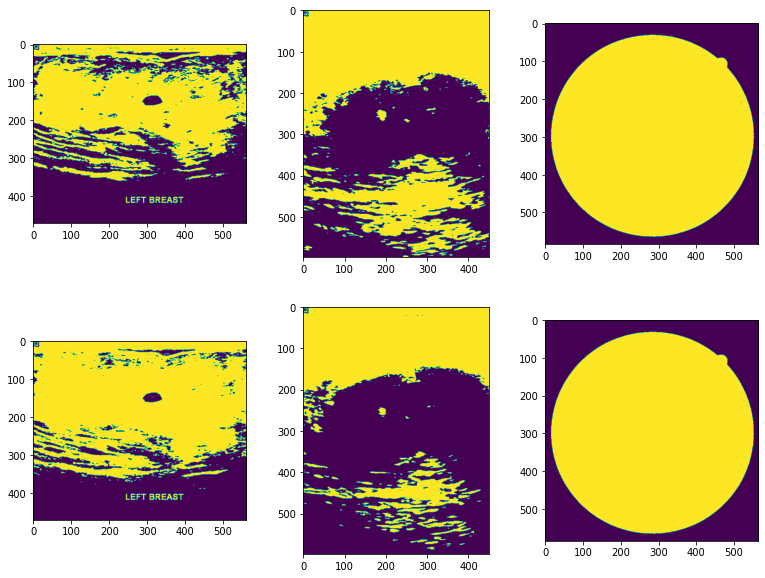

In [11]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary4)
ax[1,0].imshow(binary1)
ax[0,1].imshow(binary5)
ax[1,1].imshow(binary2)
ax[0,2].imshow(binary6)
ax[1,2].imshow(binary3)

###Plotando as imagens em escala de cinzas e em seguida seus histogramas

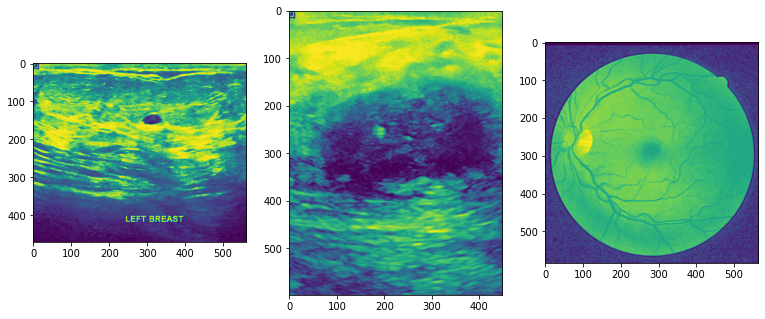

In [12]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_equalized_mama1_gray)
ax[1].imshow(img_equalized_mama2_gray)
ax[2].imshow(img_equalized_retina_gray)

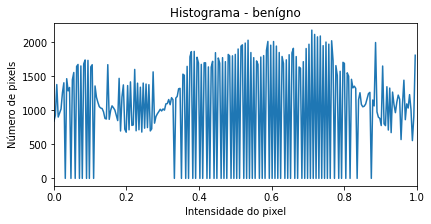

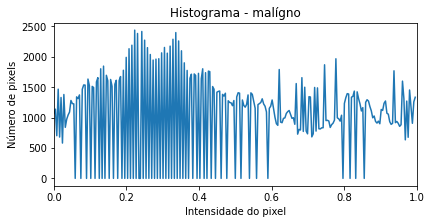

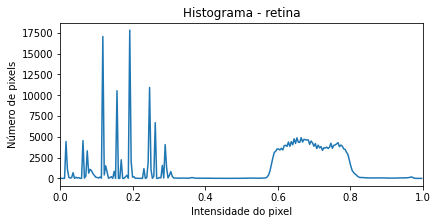

In [13]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram4, bin_edges = np.histogram(img_equalized_mama1_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - benígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram4)

#Histograma do tumor malígno
histogram5, bin_edges = np.histogram(img_equalized_mama2_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - malígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram5)

#Histograma de vasos da retina
histogram6, bin_edges = np.histogram(img_equalized_retina_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram6)

###Reescalando a intensidade do histograma de retina em em seguida plotando

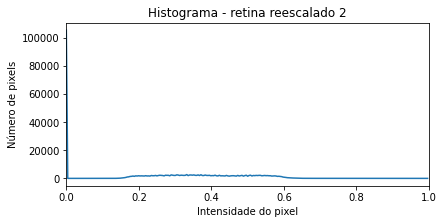

In [14]:
img_retina_gray_rescaled2 = exposure.rescale_intensity(img_equalized_retina_gray, in_range=(0.5, 1))

rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram6_2, bin_edges = np.histogram(img_retina_gray_rescaled2, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina reescalado 2")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram6_2)

###Plotando nova limiarização da retina e retornando seu novo limiar de Otsu

Retina:  0.23013733771233635


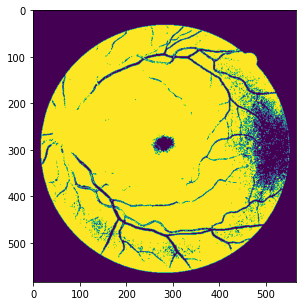

In [15]:
rcParams['figure.figsize'] = 8, 5
thresh1 = threshold_otsu(img_retina_gray_rescaled2)
binary6_2 = img_retina_gray_rescaled2 > thresh1
print("Retina: ", threshold_otsu(img_retina_gray_rescaled2))
imgplot = plt.imshow(binary6_2)

##Limiarização CLAHE

###Equalização adaptativa e em seguida plotando as imagens CLAHE e originais

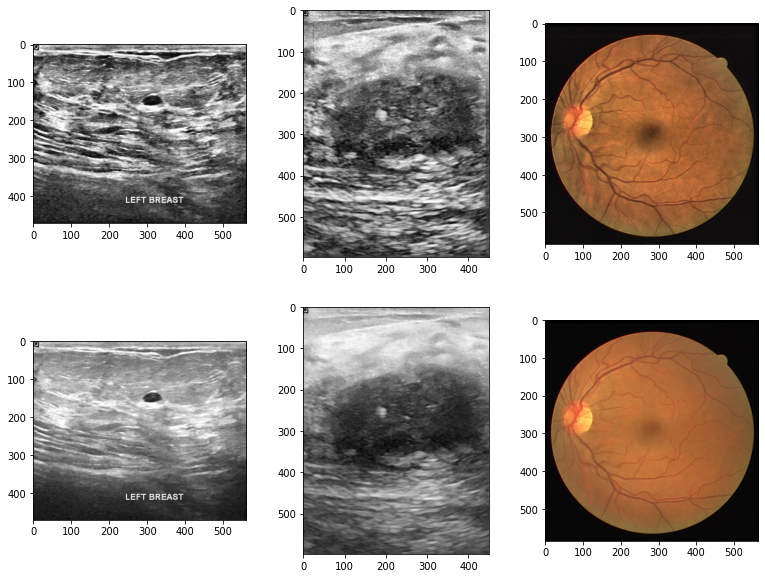

In [16]:
img_adpt_equalized_mama1 = exposure.equalize_adapthist(img_mama1)
img_adpt_equalized_mama2 = exposure.equalize_adapthist(img_mama2)
img_adpt_equalized_retina = exposure.equalize_adapthist(img_retina)

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img_adpt_equalized_mama1)
ax[1,0].imshow(img_mama1)
ax[0,1].imshow(img_adpt_equalized_mama2)
ax[1,1].imshow(img_mama2)
ax[0,2].imshow(img_adpt_equalized_retina)
ax[1,2].imshow(img_retina)

###Convertendo em escala de cinzas, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu


In [17]:
#Imagem do tumor benígno
img_adpt_equalized_mama1_gray = rgb2gray(img_adpt_equalized_mama1)
thresh4 = threshold_otsu(img_adpt_equalized_mama1_gray)
binary7 = img_adpt_equalized_mama1_gray > thresh4
print("Benígno: ", threshold_otsu(img_adpt_equalized_mama1_gray))

#Imagem do tumor malígno
img_adpt_equalized_mama2_gray = rgb2gray(img_adpt_equalized_mama2)
thresh5 = threshold_otsu(img_adpt_equalized_mama2_gray)
binary8 = img_adpt_equalized_mama2_gray > thresh5
print("Malígno: ", threshold_otsu(img_adpt_equalized_mama2_gray))

#Imagem de retina
img_adpt_equalized_retina_gray = rgb2gray(img_adpt_equalized_retina)
thresh6 = threshold_otsu(img_adpt_equalized_retina_gray)
binary9 = img_adpt_equalized_retina_gray > thresh6
print("Retina: ", threshold_otsu(img_adpt_equalized_retina_gray))

Benígno:  0.49804685
Malígno:  0.49804685
Retina:  0.23989340637127604


###Plotando a CLAHE e a normal

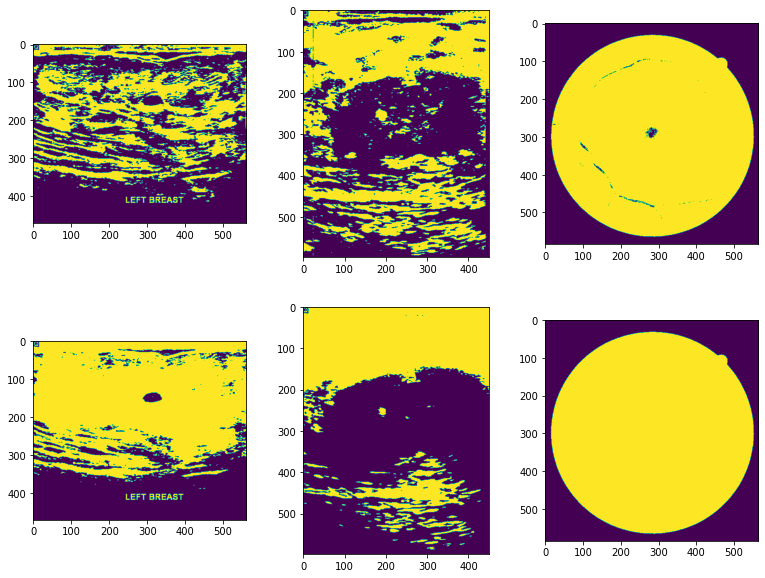

In [18]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary7)
ax[1,0].imshow(binary1)
ax[0,1].imshow(binary8)
ax[1,1].imshow(binary2)
ax[0,2].imshow(binary9)
ax[1,2].imshow(binary3)

###Plotando as imagens em escala de cinzas e seus histogramas

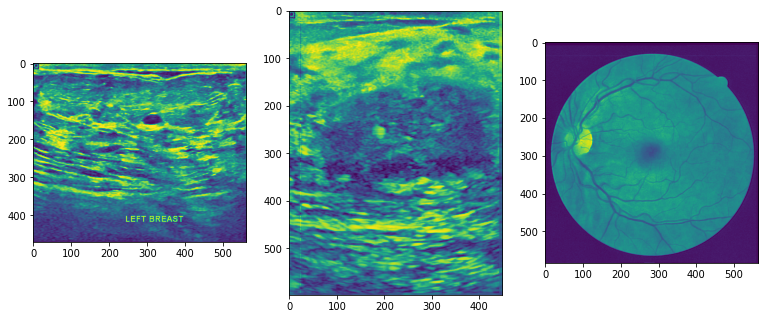

In [19]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_adpt_equalized_mama1_gray)
ax[1].imshow(img_adpt_equalized_mama2_gray)
ax[2].imshow(img_adpt_equalized_retina_gray)

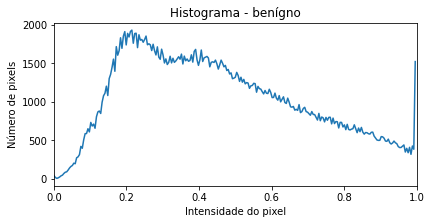

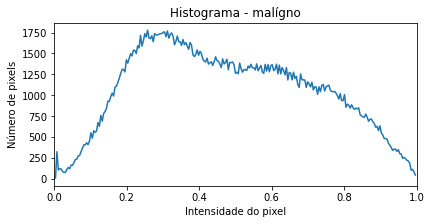

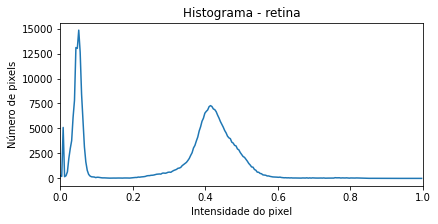

In [20]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram7, bin_edges = np.histogram(img_adpt_equalized_mama1_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - benígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram7)

#Histograma do tumor malígno
histogram8, bin_edges = np.histogram(img_adpt_equalized_mama2_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - malígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram8)

#Histograma de vasos da retina
histogram9, bin_edges = np.histogram(img_adpt_equalized_retina_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram9)

###Reescalando a intensidade do histograma de retina em em seguida plotando

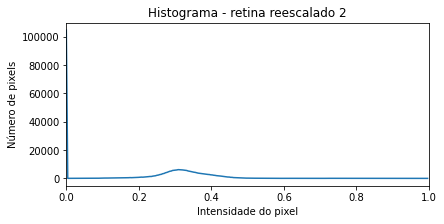

In [28]:
#img_retina_gray_rescaled3 = exposure.rescale_intensity(img_adpt_equalized_retina_gray)
img_retina_gray_rescaled3 = exposure.rescale_intensity(img_adpt_equalized_retina_gray, in_range=(0.15, 1))

rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram9_2, bin_edges = np.histogram(img_retina_gray_rescaled3, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina reescalado 2")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram9_2)

###Plotando a nova limiarização da retina e retornando seu novo limiar

Retina:  0.17026022651078188


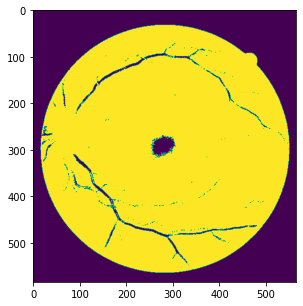

In [29]:
rcParams['figure.figsize'] = 8, 5
thresh1 = threshold_otsu(img_retina_gray_rescaled3)
binary9_2 = img_retina_gray_rescaled3 > thresh1
print("Retina: ", threshold_otsu(img_retina_gray_rescaled3))
imgplot = plt.imshow(binary9_2)

##Intersection Over Union (IoU)

###Importando as mascaras

In [23]:
img_mama1_gd = mpimg.imread('benign (1)_mask.png')
img_mama2_gd = mpimg.imread('malignant (1)_mask.png')
img_retina_gd = mpimg.imread('01_test_mask.gif')

###Plotando as mascaras, as limiarizações normais e suas IoU

IoU - Limiarização normal mama1: 0.0006482600111972184
IoU - Limiarização normal mama2: 0.041818698128472616
IoU - Limiarização normal retina: 0.9979001130023936



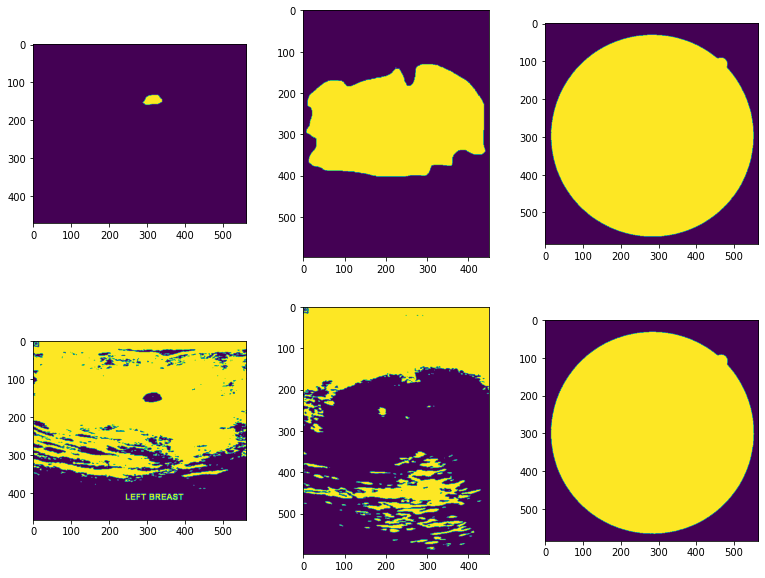

In [24]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img_mama1_gd)
ax[1,0].imshow(binary1)
ax[0,1].imshow(img_mama2_gd)
ax[1,1].imshow(binary2)
ax[0,2].imshow(img_retina_gd)
ax[1,2].imshow(binary3)

intersection1 = np.logical_and(img_mama1_gd, binary1)
union1 = np.logical_or(img_mama1_gd, binary1)
iou_score1 = np.sum(intersection1) / np.sum(union1)
print("IoU - Limiarização normal mama1: %s" % iou_score1)

intersection2 = np.logical_and(img_mama2_gd, binary2)
union2 = np.logical_or(img_mama2_gd, binary2)
iou_score2 = np.sum(intersection2) / np.sum(union2)
print("IoU - Limiarização normal mama2: %s" % iou_score2)

intersection3 = np.logical_and(img_retina_gd, binary3)
union3 = np.logical_or(img_retina_gd, binary3)
iou_score3 = np.sum(intersection3) / np.sum(union3)
print("IoU - Limiarização normal retina: %s" % iou_score3)

print()

###Plotando as mascaras, as limiarizações equalizadas e suas IoU

IoU - Limiarização normal mama1: 0.0005855915206347812
IoU - Limiarização normal mama1: 0.08034185588447103
IoU - Limiarização normal mama1: 0.9975625594904504



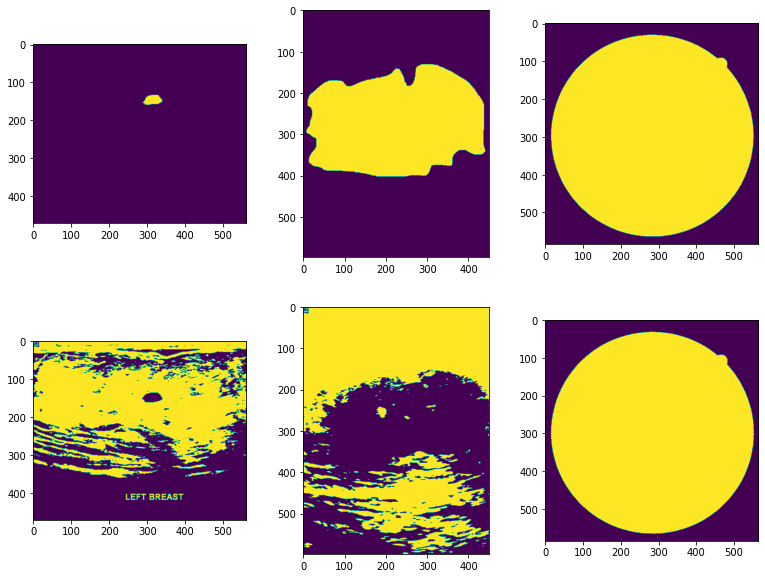

In [25]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img_mama1_gd)
ax[1,0].imshow(binary4)
ax[0,1].imshow(img_mama2_gd)
ax[1,1].imshow(binary5)
ax[0,2].imshow(img_retina_gd)
ax[1,2].imshow(binary6)

intersection4 = np.logical_and(img_mama1_gd, binary4)
union4 = np.logical_or(img_mama1_gd, binary4)
iou_score4 = np.sum(intersection4) / np.sum(union4)
print("IoU - Limiarização normal mama1: %s" % iou_score4)

intersection5 = np.logical_and(img_mama2_gd, binary5)
union5 = np.logical_or(img_mama2_gd, binary5)
iou_score5 = np.sum(intersection5) / np.sum(union5)
print("IoU - Limiarização normal mama1: %s" % iou_score5)

intersection6 = np.logical_and(img_retina_gd, binary6)
union6 = np.logical_or(img_retina_gd, binary6)
iou_score6 = np.sum(intersection6) / np.sum(union6)
print("IoU - Limiarização normal mama1: %s" % iou_score6)

print()

###Plotando as mascaras, a CLAHE e suas IoU

IoU - Limiarização normal mama1: 0.00038747968094356025
IoU - Limiarização normal mama1: 0.09101976032832862
IoU - Limiarização normal mama1: 0.9929874521669485



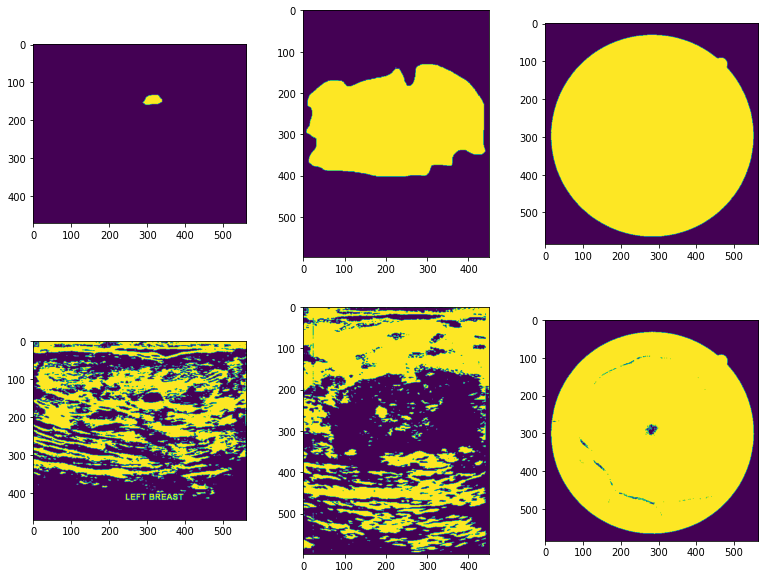

In [26]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img_mama1_gd)
ax[1,0].imshow(binary7)
ax[0,1].imshow(img_mama2_gd)
ax[1,1].imshow(binary8)
ax[0,2].imshow(img_retina_gd)
ax[1,2].imshow(binary9)

intersection7 = np.logical_and(img_mama1_gd, binary7)
union7 = np.logical_or(img_mama1_gd, binary7)
iou_score7 = np.sum(intersection7) / np.sum(union7)
print("IoU - Limiarização normal mama1: %s" % iou_score7)

intersection8 = np.logical_and(img_mama2_gd, binary8)
union8 = np.logical_or(img_mama2_gd, binary8)
iou_score8 = np.sum(intersection8) / np.sum(union8)
print("IoU - Limiarização normal mama1: %s" % iou_score8)

intersection9 = np.logical_and(img_retina_gd, binary9)
union9 = np.logical_or(img_retina_gd, binary9)
iou_score9 = np.sum(intersection9) / np.sum(union9)
print("IoU - Limiarização normal mama1: %s" % iou_score9)

print()